# 1 - Entendimento do Negócio
- Um gerente no banco está preocupado com o número crescente de transações fraudulentas ocorrendo nos serviços de cartão de crédito. Eles gostariam muito de prever a probabilidade de uma transação ser fraudulenta para que possam tomar medidas proativas para prevenir atividades fraudulentas e proteger os clientes e os interesses financeiros do banco.

- <b>Objetivo do Negócio</b>
    - O banco visa maximizar a detecção de fraudes e minimizar o custo das fraudes e a taxa de falsos positivos para maximizar a lucratividade e a satisfação do cliente.

- <b>Quais são os objetivos do projeto?</b>
    - <b>1. Identificar os fatores associados a transações fraudulentas.</b>
    - <b>2. Construir um modelo capaz de prever com precisão a probabilidade de uma transação ser fraudulenta.</b>
    - <b>3. Oferecer planos de ação para o banco reduzir a ocorrência de fraudes em transações com cartão de crédito.</b>

- <b>Quais são os beneficios?</b>
    - <b>1. Redução de Custos:</b> Menos perdas financeiras devido a fraudes. 
    - <b>2. Melhoria na Segurança do Cliente:</b> Proteção dos clientes contra fraudes. 
    - <b>3. Experiência do Cliente Aprimorada:</b> Menos interrupções para clientes legítimos. 



### Importando as bibliotecas

In [2]:
#Manipulação e visualização dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Divisão dos dados
from sklearn.model_selection import train_test_split

#Filtrar warnings
import warnings
warnings.filterwarnings('ignore')


# 2 - Entendimento dos Dado

In [3]:
data_path = "./fraud_detection_dataset.csv"
df = pd.read_csv(data_path)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Colunas
<b>1. step:</b> representa as horas totais decorridas desde o início da simulação. Essa característica variará entre 1 e 744 (30 dias).<br>
<b>2. type:</b> tipo de transação (depósito, saque, débito, pagamento e transferência).<br>
<b>3. amount:</b> total transacionado.<br>
<b>4. nameOrig:</b> cliente que iniciou a transação.<br>
<b>5. oldbalanceOrg:</b> saldo da conta original antes da transação.<br>
<b>6. newbalanceOrig:</b> saldo da conta original após a transação.<br>
<b>7. nameDest:</b> cliente de destino da transação.<br>
<b>8. oldbalanceDest:</b> saldo da conta de destino antes da transação.<br>
<b>9. newbalanceDest:</b> saldo da conta de destino após a transação.<br>
<b>10. isFraud:</b> sinalizador que define se a transação é fraudulenta ou não. Nesta simulação, o objetivo da fraude é assumir a conta do usuário, esvaziá-la transferindo-a para outra conta e, em seguida, retirar o dinheiro.<br>
<b>11. isFlaggedFraud:</b> sinalizado automaticamente pelo banco como fraude por tentar transferir mais de 200.000 em uma única transação.<br>

In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Não a presença de valores nulos no dataset.

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# EDA

6354407.0
8213.0


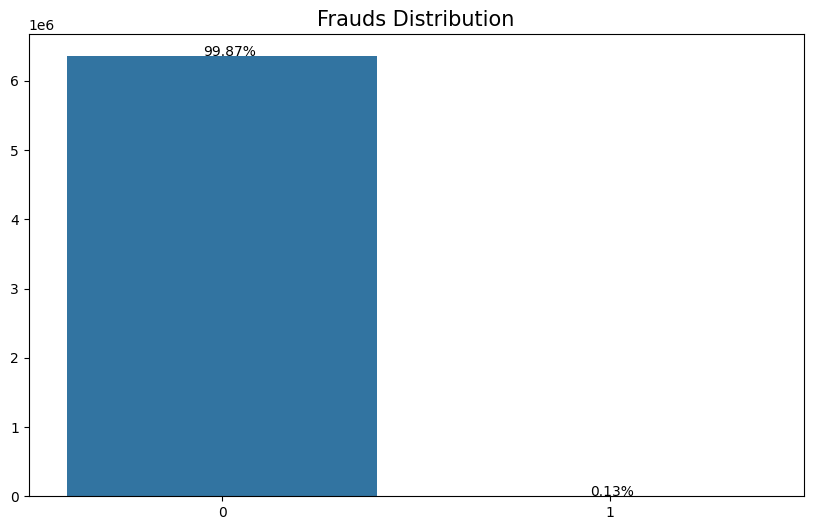

In [7]:

# frauds distribution
plt.figure(figsize = (10,6))

ax = sns.countplot(data=df, x="isFraud")
ax.set_title('Frauds Distribution', fontsize = 15)
ax.set_xlabel("")
ax.set_ylabel("")
for p in ax.patches:
    print(p.get_height())
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df.isFraud)), (p.get_x()+ 0.35, p.get_height()+1000))

Podemos ver que a distribuição do nosso target, que no caso é se transação é fraudulenta ou não, não é bem distribuida (somente 0,13% das transações são fraudulentas), logo quando formos analisar as metricas dos nossos modelos devemos levar isso em conta.

Agora vamos analisar as predições feitas pelo sistema bancario:

In [8]:
df["isFlaggedFraud"].sum()

16

In [9]:
print("Fraudes indicadas pelo sistema bancario: {} ({}%)".format(df["isFlaggedFraud"].sum(), round((df["isFlaggedFraud"].sum() / df["isFraud"].sum() * 100),2)))
print("Fraudes reais: {}".format(df["isFraud"].sum()))

Fraudes indicadas pelo sistema bancario: 16 (0.19%)
Fraudes reais: 8213


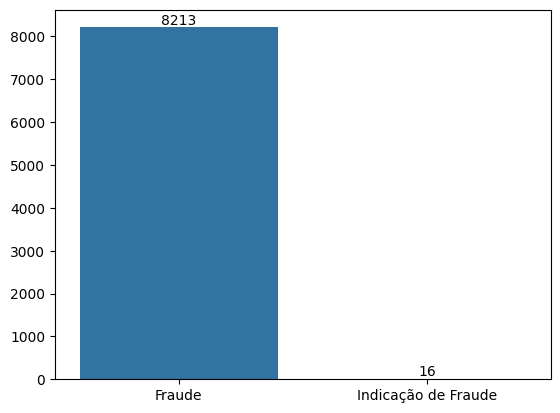

In [10]:
values = [df["isFraud"].sum(), df["isFlaggedFraud"].sum()]
ax = sns.barplot(x=["Fraude", "Indicação de Fraude"], y=values)
for i, value in enumerate(values):
    ax.annotate(f'{value}', xy=(i, value), ha='center', va='bottom')

plt.show()

O sistema bancario detectou somente 16 transações fraudulentas, de um total de 8213, somente 0,19% <br>
<b>OBS:</b> O sistema bancario identifica como fraude automaticamente transações acima de 200.000

## Dispersão das fraudes ao longo do tempo

<Axes: xlabel='step'>

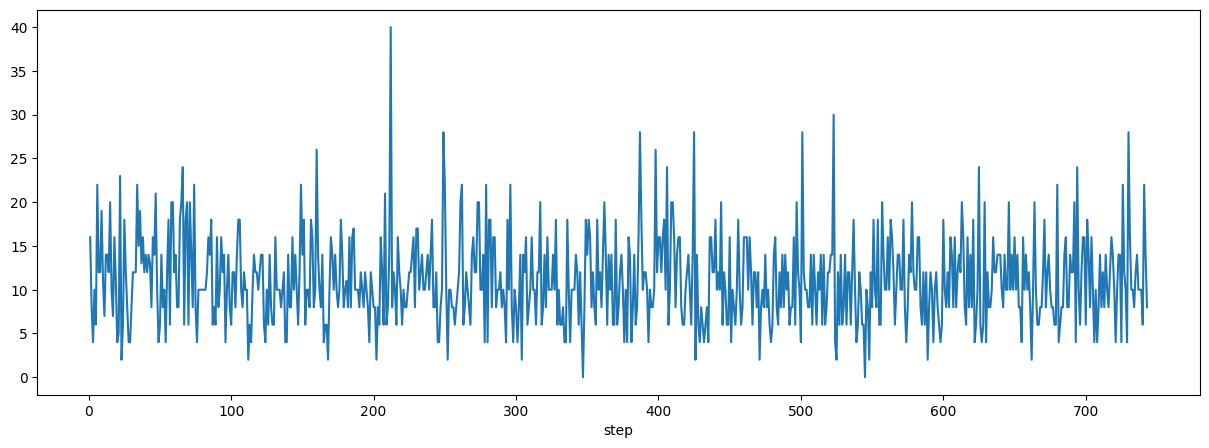

In [11]:
plt.figure(figsize=(15,5))
df.groupby("step")["isFraud"].sum().plot()

In [12]:
df.groupby("step")["isFraud"].count()[:50]

step
1      2708
2      1014
3       552
4       565
5       665
6      1660
7      6837
8     21097
9     37628
10    35991
11    37241
12    36153
13    37515
14    41485
15    44609
16    42471
17    43361
18    49579
19    51352
20    40625
21    19152
22    12635
23     6144
24     3216
25     1598
26      440
27       41
28        4
29        4
30        8
31       12
32       12
33    23616
34    30904
35    29157
36    39774
37    34000
38    31453
39    23391
40    34270
41    36348
42    41304
43    45060
44    38523
45    18500
46    12445
47     8681
48     5693
49      764
50        6
Name: isFraud, dtype: int64

In [13]:
df.groupby("step")["isFraud"].sum()[:50]

step
1     16
2      8
3      4
4     10
5      6
6     22
7     12
8     12
9     19
10    11
11     7
12    14
13    14
14    12
15    20
16    10
17     7
18    16
19    11
20     4
21     5
22    23
23     2
24     6
25    18
26    12
27     8
28     4
29     4
30     8
31    12
32    12
33    12
34    22
35    15
36    19
37    13
38    16
39    12
40    14
41    12
42    14
43    13
44     8
45    16
46    14
47    21
48    10
49     4
50     6
Name: isFraud, dtype: int64

<Axes: xlabel='step'>

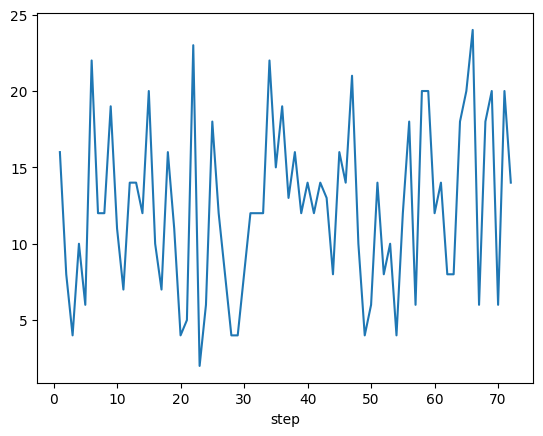

In [14]:
df.groupby("step")["isFraud"].sum()[:72].plot()

<Axes: xlabel='step'>

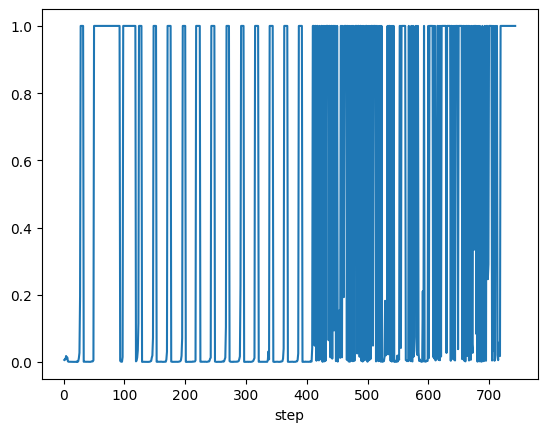

In [15]:
(df.groupby("step")["isFraud"].sum()/df.groupby("step")["isFraud"].count()).plot()

In [16]:
(df.groupby("step")["isFraud"].sum()/df.groupby("step")["isFraud"].count())[:50]

step
1     0.005908
2     0.007890
3     0.007246
4     0.017699
5     0.009023
6     0.013253
7     0.001755
8     0.000569
9     0.000505
10    0.000306
11    0.000188
12    0.000387
13    0.000373
14    0.000289
15    0.000448
16    0.000235
17    0.000161
18    0.000323
19    0.000214
20    0.000098
21    0.000261
22    0.001820
23    0.000326
24    0.001866
25    0.011264
26    0.027273
27    0.195122
28    1.000000
29    1.000000
30    1.000000
31    1.000000
32    1.000000
33    0.000508
34    0.000712
35    0.000514
36    0.000478
37    0.000382
38    0.000509
39    0.000513
40    0.000409
41    0.000330
42    0.000339
43    0.000289
44    0.000208
45    0.000865
46    0.001125
47    0.002419
48    0.001757
49    0.005236
50    1.000000
Name: isFraud, dtype: float64

In [17]:
(df.groupby("step")["isFraud"].sum()/df.groupby("step")["isFraud"].count())[100:150]

step
101    1.000000
102    1.000000
103    1.000000
104    1.000000
105    1.000000
106    1.000000
107    1.000000
108    1.000000
109    1.000000
110    1.000000
111    1.000000
112    1.000000
113    1.000000
114    1.000000
115    1.000000
116    1.000000
117    1.000000
118    1.000000
119    0.001742
120    0.003817
121    0.013035
122    0.033816
123    0.115385
124    1.000000
125    1.000000
126    1.000000
127    1.000000
128    1.000000
129    0.000273
130    0.000182
131    0.000440
132    0.000278
133    0.000285
134    0.000309
135    0.000290
136    0.000330
137    0.000369
138    0.000127
139    0.000087
140    0.000378
141    0.000487
142    0.000656
143    0.002103
144    0.002838
145    0.012534
146    0.019157
147    0.071429
148    1.000000
149    1.000000
150    1.000000
Name: isFraud, dtype: float64

É possivel ver uma flutuação das fraudes durante o tempo<br>
Isso é um indicador para criar uma feature que indique a hora do dia

## Destribuição do valor das transações

<Axes: xlabel='amount'>

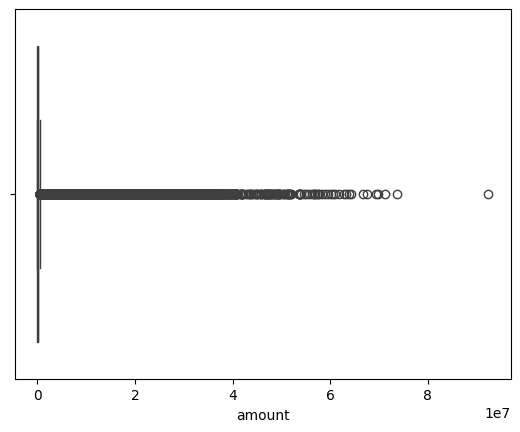

In [18]:
sns.boxplot(data=df, x="amount")

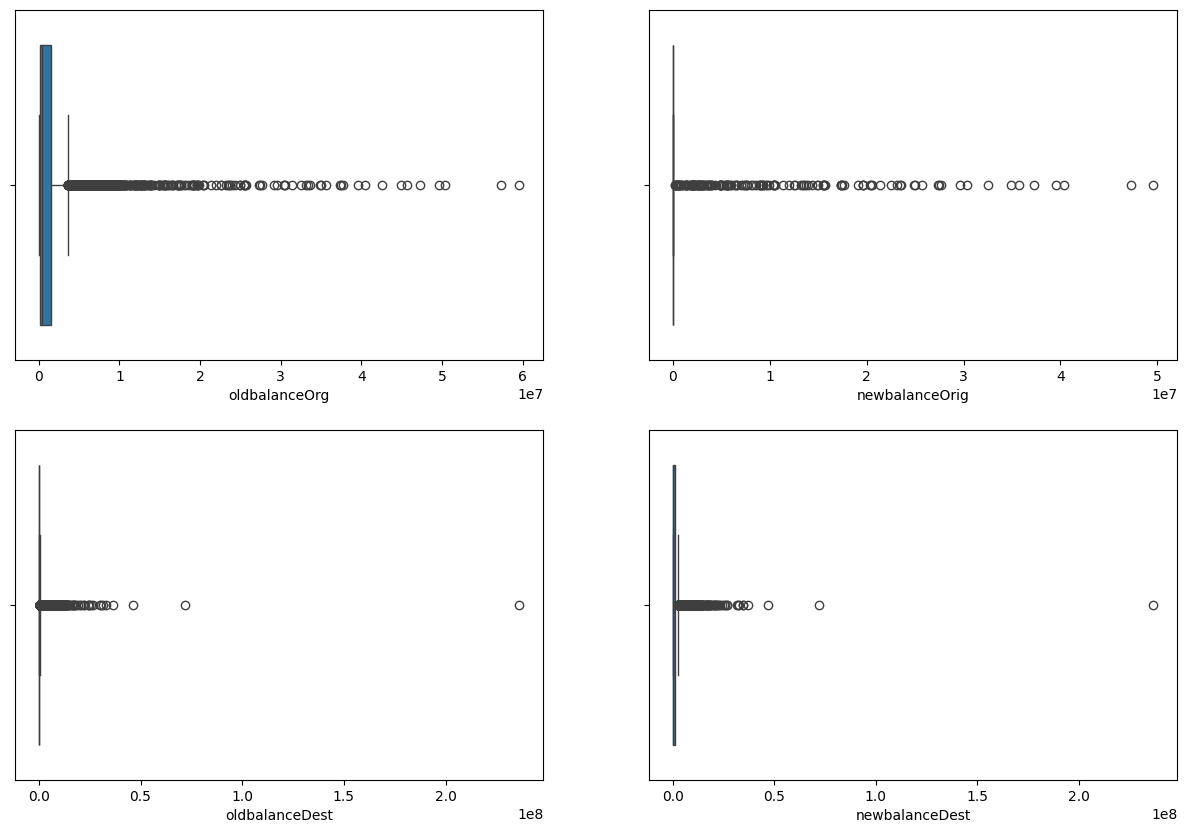

In [19]:
colunas_contas = ["oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
fig = plt.figure(figsize=(15, 10))

for coluna in colunas_contas:
  ax = fig.add_subplot(2, 2, colunas_contas.index(coluna)+1)
  sns.boxplot(df[df.isFraud==1][coluna], orient='h')

Podemos observar que tanto os valores das transações, quanto os saldos nas contas,  possuem uma inclinação para a direita

## Tipos das transações

<Axes: xlabel='type', ylabel='count'>

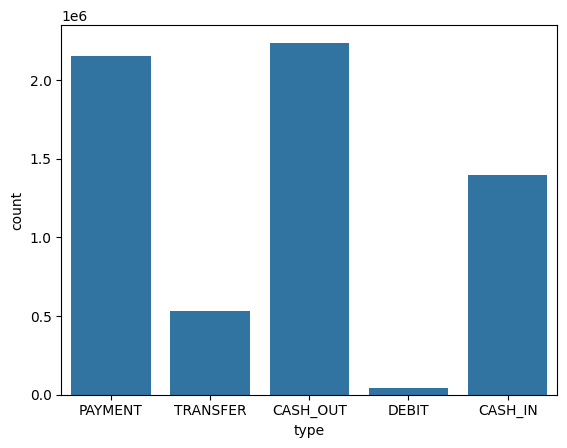

In [20]:
sns.countplot(data=df, x="type")

In [21]:
df[df["isFraud"] == 1]["type"].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

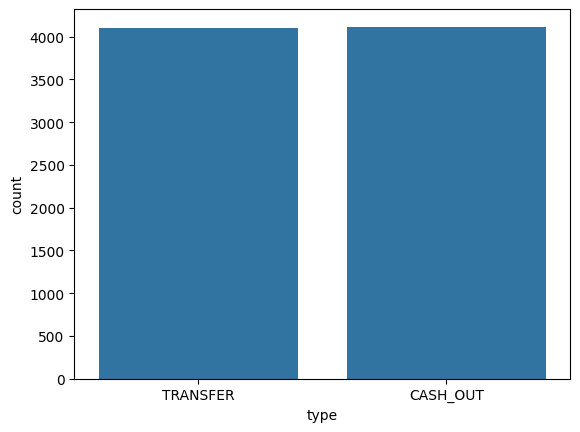

In [22]:
sns.countplot(data=df[df["isFraud"]==1], x="type")

Podemos ver que nas transações fraudulentas só foram usadas esses dois tipos de transações: Transfer e Cash_Out

## Nomes das Contas

In [23]:
df["nameOrig"].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [24]:
df["nameDest"].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

Existem quantidades muito maiores para o mesmo nome de destino em relação aos nomes de origem

### Dos nomes que receberam dinheiro, quantos estão ligados a fraudes?

In [25]:
df[df["isFraud"] == 1]["nameDest"].value_counts()

nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
              ..
C317811789     1
C24324787      1
C1053414206    1
C2013070624    1
C873221189     1
Name: count, Length: 8169, dtype: int64

Houve poucas repetições para o mesmo destinario em transações fraudulentas<br>
É importante ver se houve transações normais para esses destinatarios antes das fraudes

In [26]:
df_Quant_Trans_Dest = pd.DataFrame({"name_dest": df["nameDest"].value_counts().index,
                                    "quantTrans": df["nameDest"].value_counts().values})

In [27]:
df_Quant_Trans_Dest.head()

,name_dest,quantTrans
0,C1286084959,113
1,C985934102,109
2,C665576141,105
3,C2083562754,102
4,C248609774,101


In [28]:
name_dest_fraudes = df[df["isFraud"] == 1]["nameDest"].value_counts().index

In [29]:
df_Quant_Trans_Dest_Fraud = df_Quant_Trans_Dest[df_Quant_Trans_Dest["name_dest"].isin(name_dest_fraudes)].reset_index()
df_Quant_Trans_Dest_Fraud.drop("index", axis=1, inplace=True)

In [30]:
df_Quant_Trans_Dest_Fraud

,name_dest,quantTrans
0,C716083600,89
1,C667346055,86
2,C932583850,82
3,C766681183,80
4,C803116137,77
...,...,...
8164,C2100877994,1
8165,C825722694,1
8166,C195893407,1
8167,C2033959349,1


Podemos ver que os destinatarios de transações fraudulentas participaram de muitas transações, mas somente 1 ou 2 dessas transações são relacionanas a fraude.<br>
Vamos analises a destribuição das quantidades de transações dessas contas

<Axes: xlabel='quantTrans'>

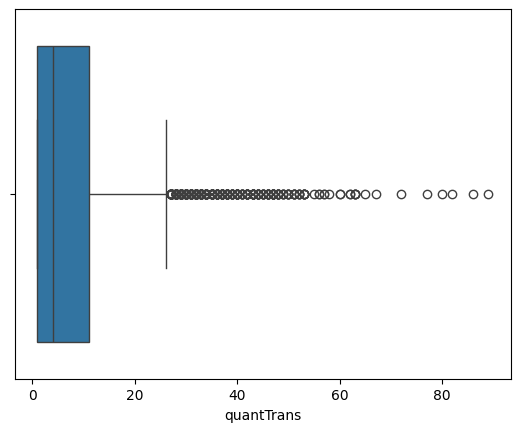

In [31]:
sns.boxplot(data=df_Quant_Trans_Dest_Fraud, x="quantTrans")

In [32]:
print("50% dos dados estão entre {} e {}".format(df_Quant_Trans_Dest_Fraud["quantTrans"].quantile(0.25),
                                                 df_Quant_Trans_Dest_Fraud["quantTrans"].quantile(0.75)))

50% dos dados estão entre 1.0 e 11.0


Agora vamos analisar os destinarios que não tem relações com fraudes

In [33]:
df_Quant_Trans_Dest_NFraud = df_Quant_Trans_Dest[~df_Quant_Trans_Dest["name_dest"].isin(name_dest_fraudes)].reset_index()
df_Quant_Trans_Dest_NFraud.drop("index", axis=1, inplace=True)

In [34]:
df_Quant_Trans_Dest_NFraud

,name_dest,quantTrans
0,C1286084959,113
1,C985934102,109
2,C665576141,105
3,C2083562754,102
4,C248609774,101
...,...,...
2714188,M612592198,1
2714189,M1470027725,1
2714190,M1330329251,1
2714191,M1784358659,1


<Axes: xlabel='quantTrans'>

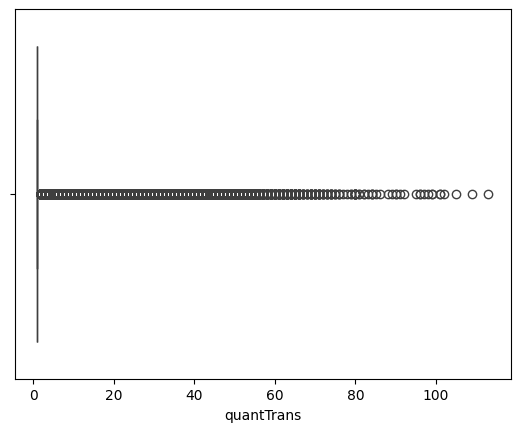

In [35]:
sns.boxplot(data=df_Quant_Trans_Dest_NFraud, x="quantTrans")

In [36]:
print("50% dos dados estão entre {} e {}".format(df_Quant_Trans_Dest_NFraud["quantTrans"].quantile(0.25),
                                                 df_Quant_Trans_Dest_NFraud["quantTrans"].quantile(0.75)))

50% dos dados estão entre 1.0 e 1.0


Olhando paras os destinatarios que participaram e não participaram de transações fraudulentas, percebe-se uma diferença na destribuição das quantidades de transações<br>
Seria interessante criar uma nova coluna com a quantidade de transações

### Agora vamos olhas para os nomes de origem

In [37]:
df_Quant_Trans_Orig = pd.DataFrame({"nameOrig": df["nameOrig"].value_counts().index,
                                    "quantTrans": df["nameOrig"].value_counts().values})

In [38]:
df_Quant_Trans_Orig.head()

,nameOrig,quantTrans
0,C1902386530,3
1,C363736674,3
2,C545315117,3
3,C724452879,3
4,C1784010646,3


In [39]:
name_orig_fraudes = df[df["isFraud"] == 1]["nameOrig"].value_counts().index

In [40]:
df_Quant_Trans_Orig_Fraud = df_Quant_Trans_Orig[df_Quant_Trans_Orig["nameOrig"].isin(name_orig_fraudes)].reset_index()
df_Quant_Trans_Orig_Fraud.drop("index", axis=1, inplace=True)

In [41]:
df_Quant_Trans_Orig_Fraud

,nameOrig,quantTrans
0,C357911107,2
1,C1882162040,2
2,C171834973,2
3,C1885333477,2
4,C803411135,2
...,...,...
8208,C1234321469,1
8209,C1246119241,1
8210,C949325212,1
8211,C1015989725,1


<Axes: xlabel='quantTrans'>

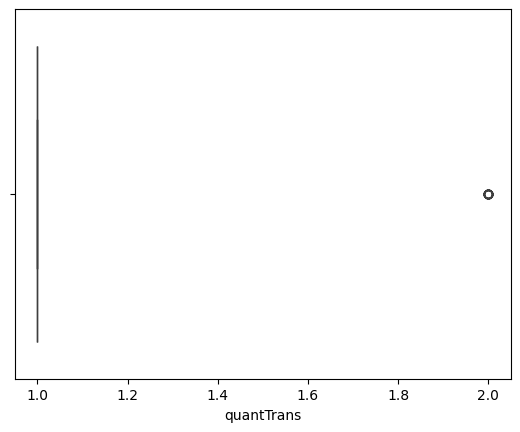

In [42]:
sns.boxplot(data=df_Quant_Trans_Orig_Fraud, x="quantTrans")

In [43]:
print("50% dos dados estão entre {} e {}".format(df_Quant_Trans_Orig_Fraud["quantTrans"].quantile(0.25),
                                                 df_Quant_Trans_Orig_Fraud["quantTrans"].quantile(0.75)))

50% dos dados estão entre 1.0 e 1.0


Agora vamos ver as contas de orig que não se relacionam com fraude

In [44]:
df_Quant_Trans_Orig_NFraud = df_Quant_Trans_Orig[~df_Quant_Trans_Orig["nameOrig"].isin(name_orig_fraudes)].reset_index()
df_Quant_Trans_Orig_NFraud.drop("index", axis=1, inplace=True)

In [45]:
df_Quant_Trans_Orig_NFraud

,nameOrig,quantTrans
0,C1902386530,3
1,C363736674,3
2,C545315117,3
3,C724452879,3
4,C1784010646,3
...,...,...
6345089,C740782868,1
6345090,C98968405,1
6345091,C720209255,1
6345092,C1567523029,1


<Axes: xlabel='quantTrans'>

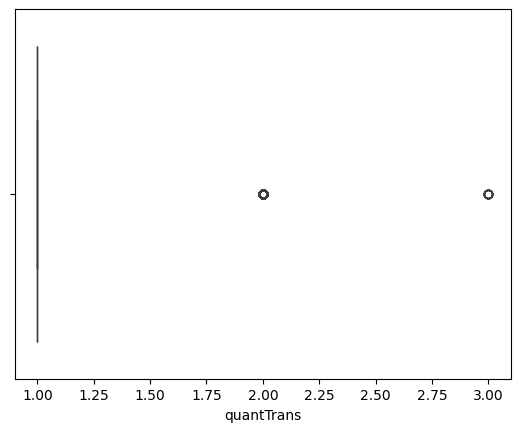

In [46]:
sns.boxplot(data=df_Quant_Trans_Orig_NFraud, x="quantTrans")

In [47]:
print("50% dos dados estão entre {} e {}".format(df_Quant_Trans_Orig_NFraud["quantTrans"].quantile(0.25),
                                                 df_Quant_Trans_Orig_NFraud["quantTrans"].quantile(0.75)))

50% dos dados estão entre 1.0 e 1.0


Neste caso, tanto as contas de origem que estão relacionadas a fraude, quanto as contas que não estão relacionas, possuem uma destribuição parecida de quantidade de transações.<br>
Logo, nesse caso não seria interessante criar uma nova coluna para colocar a quantidade de transações.

## Correlações

<Axes: >

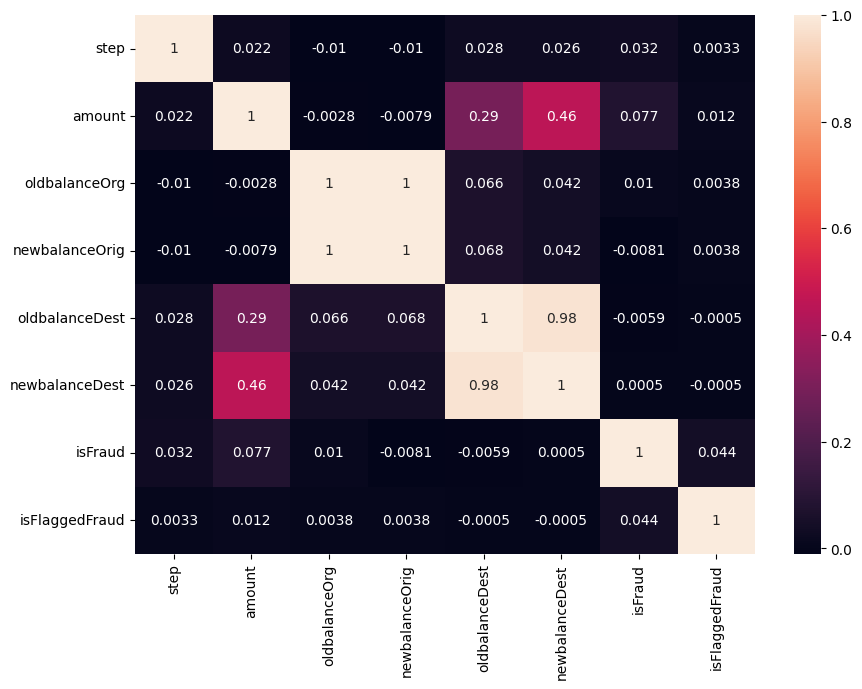

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(round(df.corr(numeric_only=True), 4), annot=True)

Vemos que não existe uma correlação muito entre fraude e as caracteristicas numericas.<br>
Mas podemos ver que existe uma forte correlação entre newbalanceDest e oldbalanceDest, assim como newbalancedest e amount.Então podemos considerar a remoção de newbalanceDest.

# Criação de caracteristicas

Primeiro vamos dividir o tempo em horas do dia, ou seja, de 0 a 23

## Horas

In [49]:
from datetime import datetime as dt
from datetime import timedelta as td

In [50]:
df_copy = df.copy()

In [51]:
data_inicio = dt(2021, 1, 1, 0, 0, 0)
datas = [data_inicio]

In [52]:
x = 1
for i in range(1, 743):
    data_inicio += td(seconds=3600)
    datas.append(data_inicio)

In [53]:
df_datas = pd.DataFrame({"dates": datas})

In [54]:
df_datas["step"] = df_datas.index + 1
df_datas["hours"] = df_datas["dates"].dt.hour

In [55]:
df_datas.drop("dates", axis=1, inplace=True)

In [56]:
df_datas

,step,hours
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4
...,...,...
738,739,18
739,740,19
740,741,20
741,742,21


In [57]:
df_com_horas = pd.merge(df_copy, df_datas, on="step", how="left")

In [58]:
df_com_horas

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hours
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,22
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,22
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,22
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,22


## Nomes Dest

In [59]:
df_nomes_dest = pd.DataFrame({"nameDest": df_copy["nameDest"].value_counts().index,
                              "quantTrans": df_copy["nameDest"].value_counts().values})

In [60]:
df_nomes_dest

,nameDest,quantTrans
0,C1286084959,113
1,C985934102,109
2,C665576141,105
3,C2083562754,102
4,C248609774,101
...,...,...
2722357,M1470027725,1
2722358,M1330329251,1
2722359,M1784358659,1
2722360,M2081431099,1


In [61]:
df_novas_colunas = pd.merge(df_com_horas, df_nomes_dest, on="nameDest", how="left")

In [62]:
df_novas_colunas

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hours,quantTrans
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,44
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,41
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,22,2
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,22,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,22,3
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,22,1


<Axes: xlabel='hours', ylabel='count'>

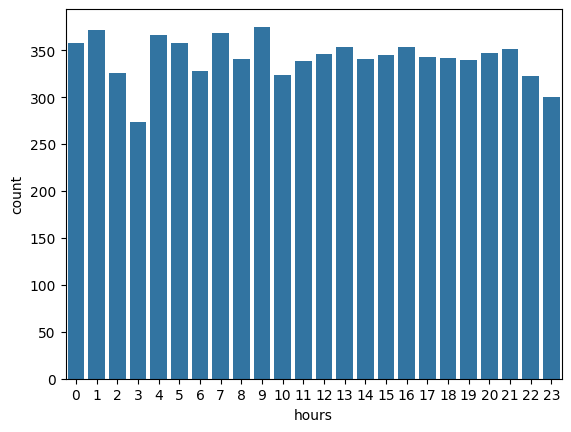

In [63]:
sns.countplot(data=df_novas_colunas[df_novas_colunas["isFraud"] == 1], x="hours")

 Em geral a quantidade de fraudes durante o dia é constante.Existe uma diminuição mais consideravel no horario de 3Horas

<Axes: xlabel='hours', ylabel='count'>

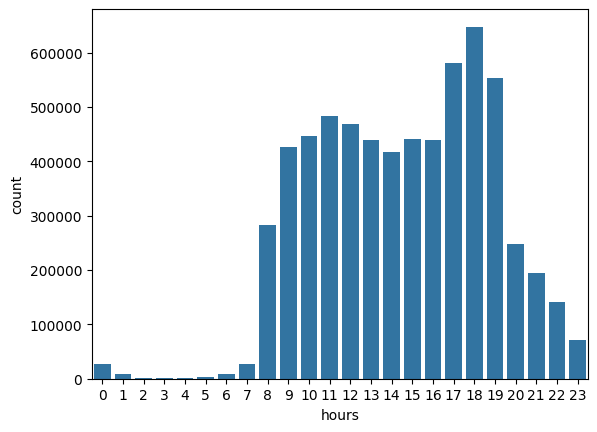

In [64]:
sns.countplot(data=df_novas_colunas, x="hours")

Podemos ver um concentração de transações entre 9h e 19h, porem em relação a fraudes não conseguimos tirar informações desse grafico<br>
Vamos agora analisar a porcentagem das transações fraudulentas  em relação ao total de transações em cada hora.

<Axes: xlabel='hours'>

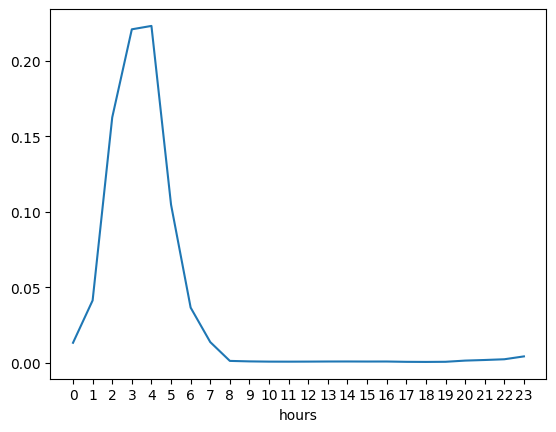

In [65]:
(df_novas_colunas.groupby("hours")["isFraud"].sum()/df_novas_colunas.groupby("hours")["isFraud"].count()).plot(xticks=df_novas_colunas["hours"].unique())

Com esse grafico é perceptivel uma concentração de fraudes nas primeiras 8 horas<br>
Podemos criar uma nova coluna, que diz se a transação foi ou não efetuada nas primeiras 8 horas do dia.<br>
[0...7] -> 1 e [8...23] -> 0

In [66]:
df_novas_colunas["hours_class"] = df_novas_colunas["hours"].apply(lambda x: 0 if x > 7 else 1)

In [67]:
df_novas_colunas.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hours,quantTrans,hours_class
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,44,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,41,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,1


Agora temos 2 novas colunas que são quantTrans e hour_class.<br>
Vamos excluir as colunas relacionas a essas novas caracteristicas, como tambem a newbalanceDest

In [68]:
df_final = df_novas_colunas.drop(["step","nameOrig", "nameDest", "newbalanceDest","hours"], axis=1)

In [69]:
df_final = df_final[["type", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "hours_class", "quantTrans", "isFlaggedFraud", "isFraud"]]

In [70]:
df_final

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,hours_class,quantTrans,isFlaggedFraud,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,1,1,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,1,1,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,1,44,0,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,1,41,0,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,1,1,0,0
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,0,2,0,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0,1,0,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,0,3,0,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0,1,0,1


<Axes: >

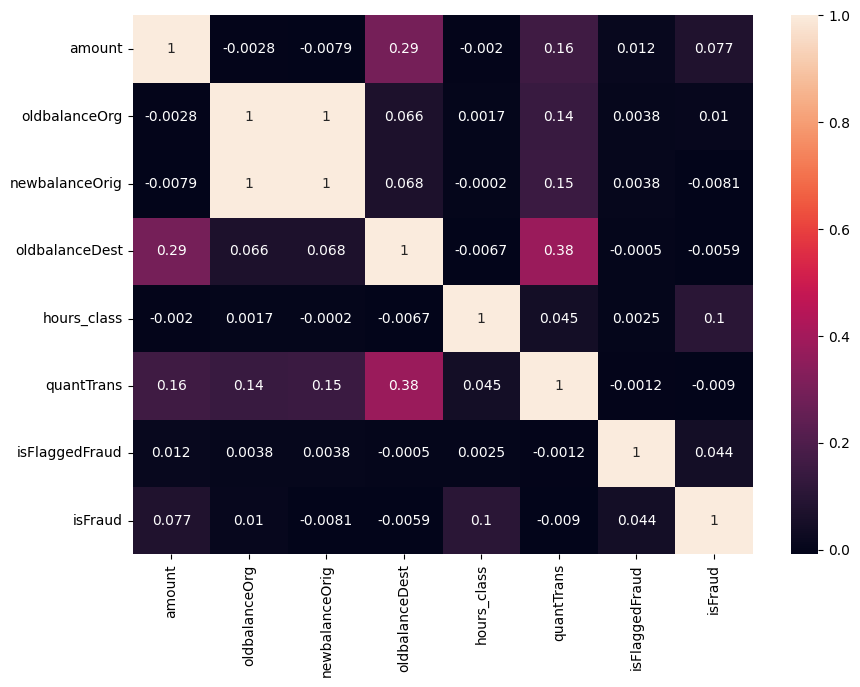

In [71]:
plt.figure(figsize=(10,7))
sns.heatmap(round(df_final.corr(numeric_only=True), 4), annot=True)

# Preprocessamento

In [72]:
from sklearn.preprocessing import OrdinalEncoder


In [73]:
RANDOM_STATE = 42

In [74]:
X = df_final.drop("isFraud", axis=1)
y = df_final["isFraud"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y ,random_state=RANDOM_STATE)

In [76]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

Test target proportion: 
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [77]:
def preprocessamento(X_train, X_test, coluna):
    oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    X_train[coluna] = oe.fit_transform(X_train[coluna])
    X_test[coluna] = oe.transform(X_test[coluna])
    return X_train, X_test

In [78]:
colunas_Cat = ["type"]
X_train, X_test = preprocessamento(X_train,  X_test, colunas_Cat)

In [79]:
X_train

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,hours_class,quantTrans,isFlaggedFraud
292779,3.0,9914.74,44248.00,34333.26,0.00,0,1,0
499763,3.0,6854.53,0.00,0.00,0.00,0,1,0
2970411,1.0,361211.80,0.00,0.00,489745.16,0,16,0
3137549,3.0,7083.51,0.00,0.00,0.00,0,1,0
1500682,0.0,218019.51,13045685.58,13263705.09,2438123.98,0,30,0
...,...,...,...,...,...,...,...,...
1524870,3.0,1895.99,0.00,0.00,0.00,0,1,0
5834821,1.0,347110.99,103785.00,0.00,87871.75,0,2,0
4182953,3.0,13259.63,0.00,0.00,0.00,0,1,0
3985280,3.0,24122.92,0.00,0.00,0.00,0,1,0


# Treinamento do Modelo

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [82]:
def cross_val_models(X_train, y_train, models):
  cross_val_rec = []
  cross_val_prec = []
  cross_val_accur = []
  cross_val_f1 = []

  for model in models:
    cross_val_rec.append(cross_val_score(model, X_train, y_train, cv=5, scoring = 'recall').mean())
    cross_val_prec.append(cross_val_score(model, X_train, y_train, cv=5, scoring = 'precision').mean())
    cross_val_accur.append(cross_val_score(model, X_train, y_train, cv=5, scoring = 'accuracy').mean())
    cross_val_f1.append(cross_val_score(model, X_train, y_train, cv=5, scoring = 'f1').mean())

  df_cross_val = pd.DataFrame({'Recall': cross_val_rec,
                                  'Precision': cross_val_prec,
                                  'Accuracy': cross_val_accur,
                                  'f1': cross_val_f1},
                                  index = ['Logistic Regression', 'Random Forest', 'XGBoost'])
  return df_cross_val

## Modelo Base
Como a base de dados é muito grande, ficou inviavel para mim fazer uma buscas dos melhores parametros, então irei utilizar os modelos randomForest, regressão logistica e xgboost, com os seus parametros padrões.<br>
Utilizar o cross validation tambem se tornou inviavel pelo fato da base de dados ser muito grande.

In [103]:
lr = LogisticRegression(random_state=42)
rfc = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

### Random Forest

In [104]:
rfc = RandomForestClassifier(random_state=RANDOM_STATE)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [105]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.95      0.76      0.85      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



<Axes: >

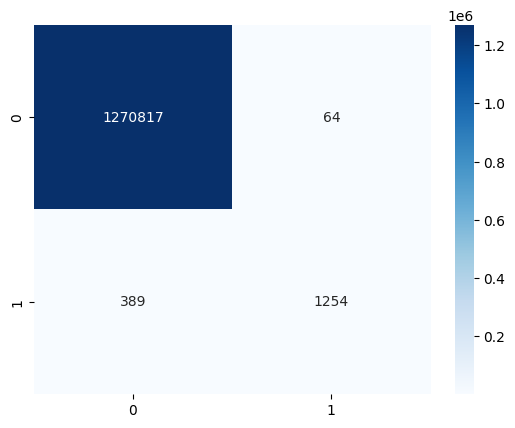

In [106]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            annot_kws={"fontsize":10},
            fmt = 'd',
            cmap = 'Blues')

### LogisticRegression

In [107]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [108]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.68      0.45      0.54      1643

    accuracy                           1.00   1272524
   macro avg       0.84      0.72      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



<Axes: >

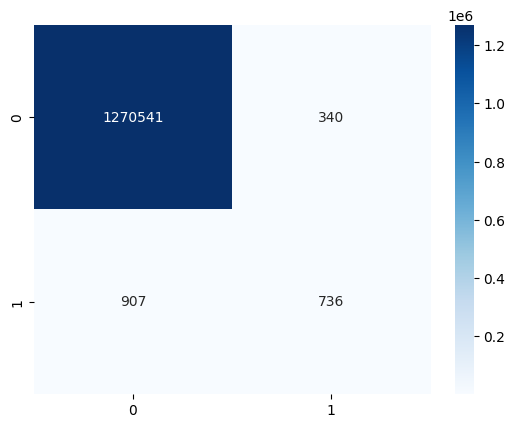

In [109]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True,
            annot_kws={"fontsize":10},
            fmt = 'd',
            cmap = 'Blues')

### XGBoost

In [110]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [111]:
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.95      0.82      0.88      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.91      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



<Axes: >

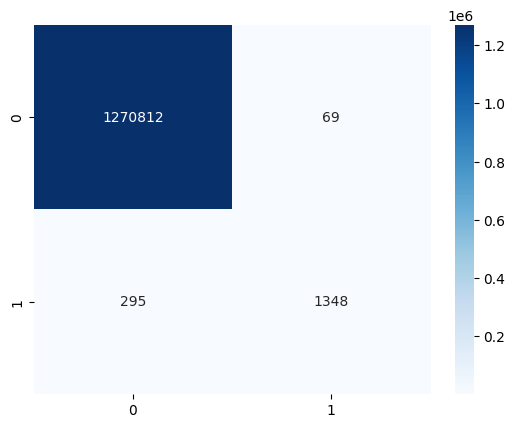

In [112]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb),
            annot=True,
            annot_kws={"fontsize":10},
            fmt = 'd',
            cmap = 'Blues')

Analisando os resultados dos modelos, oque se saiu melhor foi o XGBoost, com as seguintes metricas médias:<br>
- precision: 0.98
- recall: 0.91
- f1 : 0.94<br>

As metricas para a classe de fraude foram:<br>
- precision: 0.95
- recall: 0.82
- f1: 0.88<br>

No nosso modelo a principal metrica a ser analisada é a recall, já que queremos evitar que uma trasação fraudulenta seja classificada como não fraudulenta, e no nosso teste o XGBoost foi oque obteve o maior recall medio e tambem o maior recall para classe fraudulenta.


## Unsersampling
Iremos aplicar um balanceamento na base de dados com undersample, para assim ser possivel testar mais de um modelo, e utilizar o cross validation.

In [86]:
rus = RandomUnderSampler(random_state=RANDOM_STATE)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [97]:
lr_rus = LogisticRegression(random_state=42)
rfc_rus = RandomForestClassifier(random_state=42)
xgb_rus = XGBClassifier(random_state=42)
models = [lr_rus, rfc_rus, xgb_rus]
cross_val_models(X_train_rus, y_train_rus, models=models)

,Recall,Precision,Accuracy,f1
Logistic Regression,0.893151,0.900484,0.896728,0.896364
Random Forest,0.995890,0.985993,0.990868,0.990914
XGBoost,0.996195,0.989720,0.992922,0.992946


In [100]:
xgb_rus.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [101]:
y_pred_rus = xgb_rus.predict(X_test)
print(classification_report(y_test, y_pred_rus))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.13      1.00      0.23      1643

    accuracy                           0.99   1272524
   macro avg       0.56      0.99      0.61   1272524
weighted avg       1.00      0.99      0.99   1272524



Fazendo um balanceamento da base, com undersample, o resultado piorou, como não é possivel fazer um oversample, pelo fato da base ser muito grande, vou permanecer com a base desbalanceada.

## ROC AUC - TEST XGBoost


Random Forest Classifier TESTE score: 99.97
------------------------------------------------------------------------------------------


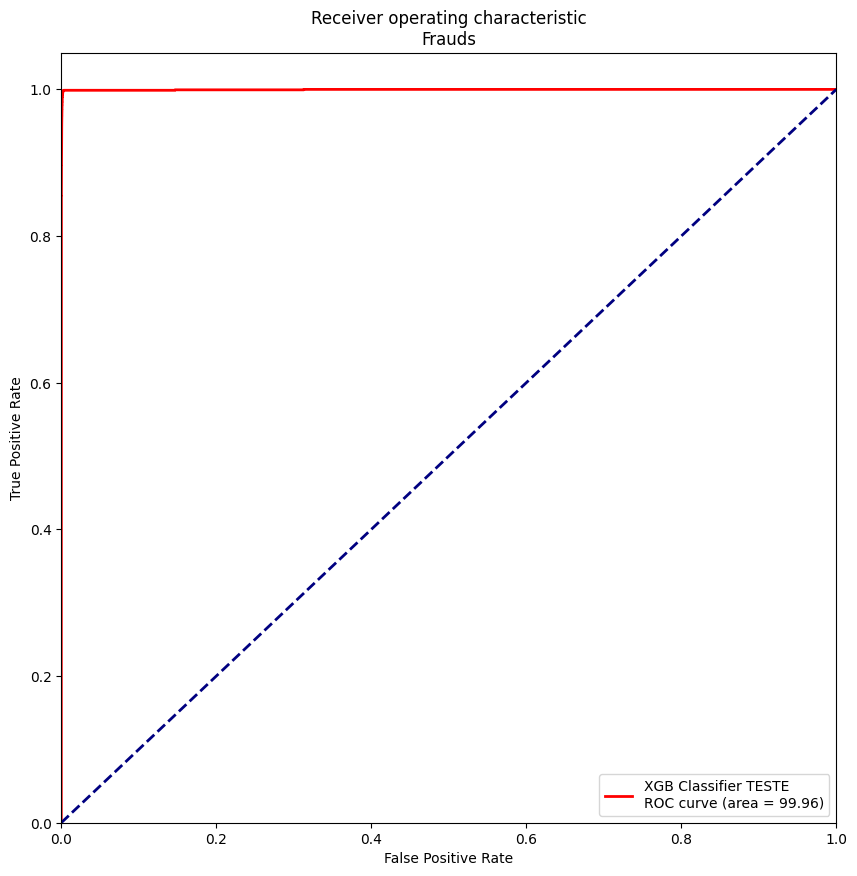

In [117]:

y_proba_teste_xgb = xgb.predict_proba(X_test)
y_proba_teste_xgb = y_proba_teste_xgb[:, 1]

print('Random Forest Classifier TESTE score:',
      round(xgb.score(X_test, y_test)*100,2))
print('-'*90)

roc_auc_xgb = roc_auc_score(y_test, y_proba_teste_xgb)

fpr_xgb, tpr_xgb, thresold_xgb = roc_curve(y_test, y_proba_teste_xgb)


plt.figure(figsize = (10,10))

plt.plot(fpr_xgb, tpr_xgb, color='Red',
        lw=2, label='XGB Classifier TESTE\nROC curve (area = %0.2f)' % round(roc_auc_score(y_test, y_proba_teste_xgb)*100,2))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic\nFrauds')
plt.legend(loc="lower right")
plt.show()